In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import openpyxl
path = 'C:\\Users\\anny_\\Documents\\Brazilian_Rainforest\\'

In [4]:
df = pd.read_csv(path + 'Input\\inpe_brazilian_amazon_fires_1999_2019.csv')
df.to_excel(path + 'Input\\Dataset_Brazilian_Deforestation.xlsx', index=False)
df1 = df[['year', 'month', 'state', 'firespots']]
df_year_all_states = df1.copy()

Text(0.5, 0, 'Number of fire outbreaks')

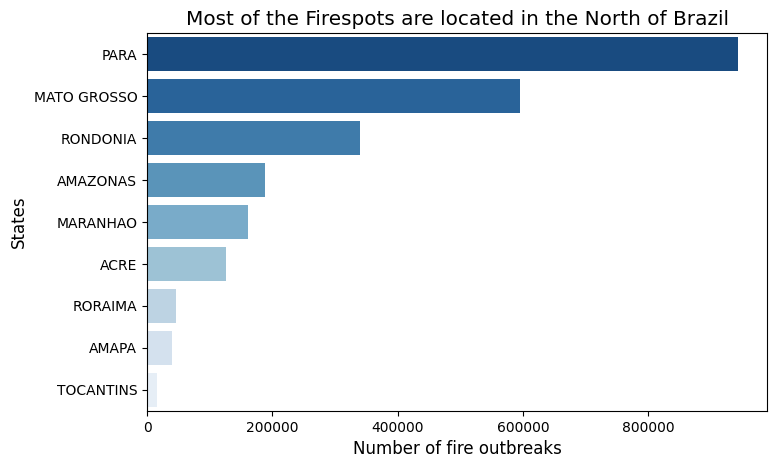

In [24]:
legal_amazon = (
    df_year_all_states[['state','firespots']].groupby('state',as_index=False).sum()
    .sort_values('firespots',ascending=False)['state'].values
)

plt.figure(figsize=(8,5), dpi=100)
sns.barplot(data=df_year_all_states, x='firespots', y='state', estimator=sum, palette='Blues_r', order=legal_amazon, ci=None)    
plt.title("Most of the Firespots are located in the North of Brazil", size="x-large")
plt.ylabel("States", size="large")
plt.xlabel("Number of fire outbreaks", size="large")

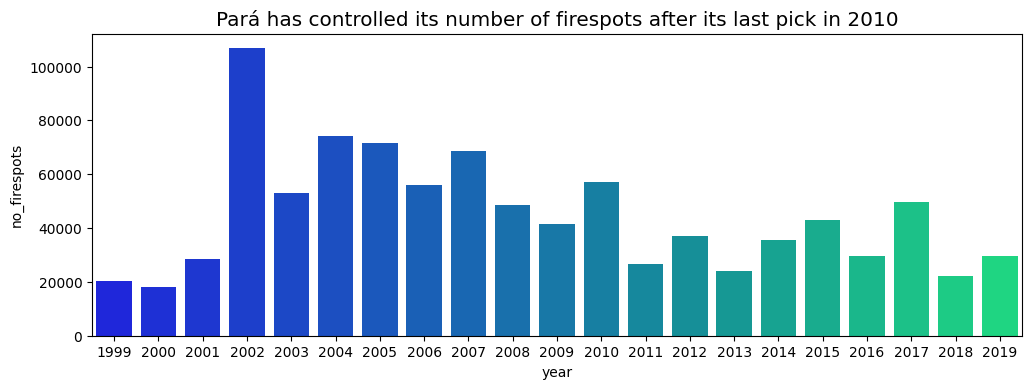

In [17]:
df_year_para = df1.copy()
df_year_para = df_year_para[df_year_para['state']=='PARA']
df_year_para['no_firespots'] = df_year_para.groupby(by=['year'])['firespots'].transform(sum)

plt.figure(figsize=(12,4), dpi=100)
chart_para = sns.barplot(x=df_year_para['year'], y=df_year_para['no_firespots'], palette='winter')
chart_para.set_xticklabels(chart_para.get_xticklabels())
plt.title("Pará has controlled its number of firespots after its last pick in 2010", size="x-large")
plt.show()

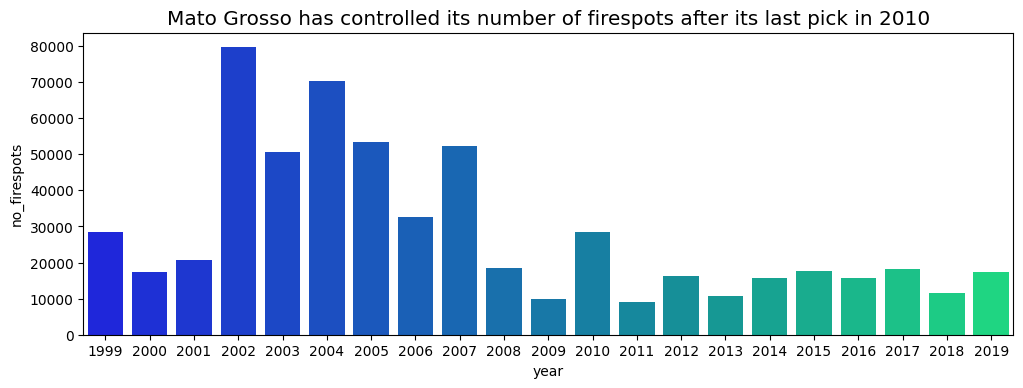

In [18]:
df_year_matogrosso = df1.copy()
df_year_matogrosso = df_year_matogrosso[df_year_matogrosso['state']=='MATO GROSSO']
df_year_matogrosso['no_firespots'] = df_year_matogrosso.groupby(by=['year'])['firespots'].transform(sum)

plt.figure(figsize=(12,4), dpi=100)
chart_matogrosso = sns.barplot(x=df_year_matogrosso['year'], y=df_year_matogrosso['no_firespots'], palette='winter')
chart_matogrosso.set_xticklabels(chart_matogrosso.get_xticklabels())
plt.title("Mato Grosso has controlled its number of firespots after its last pick in 2010", size="x-large")
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

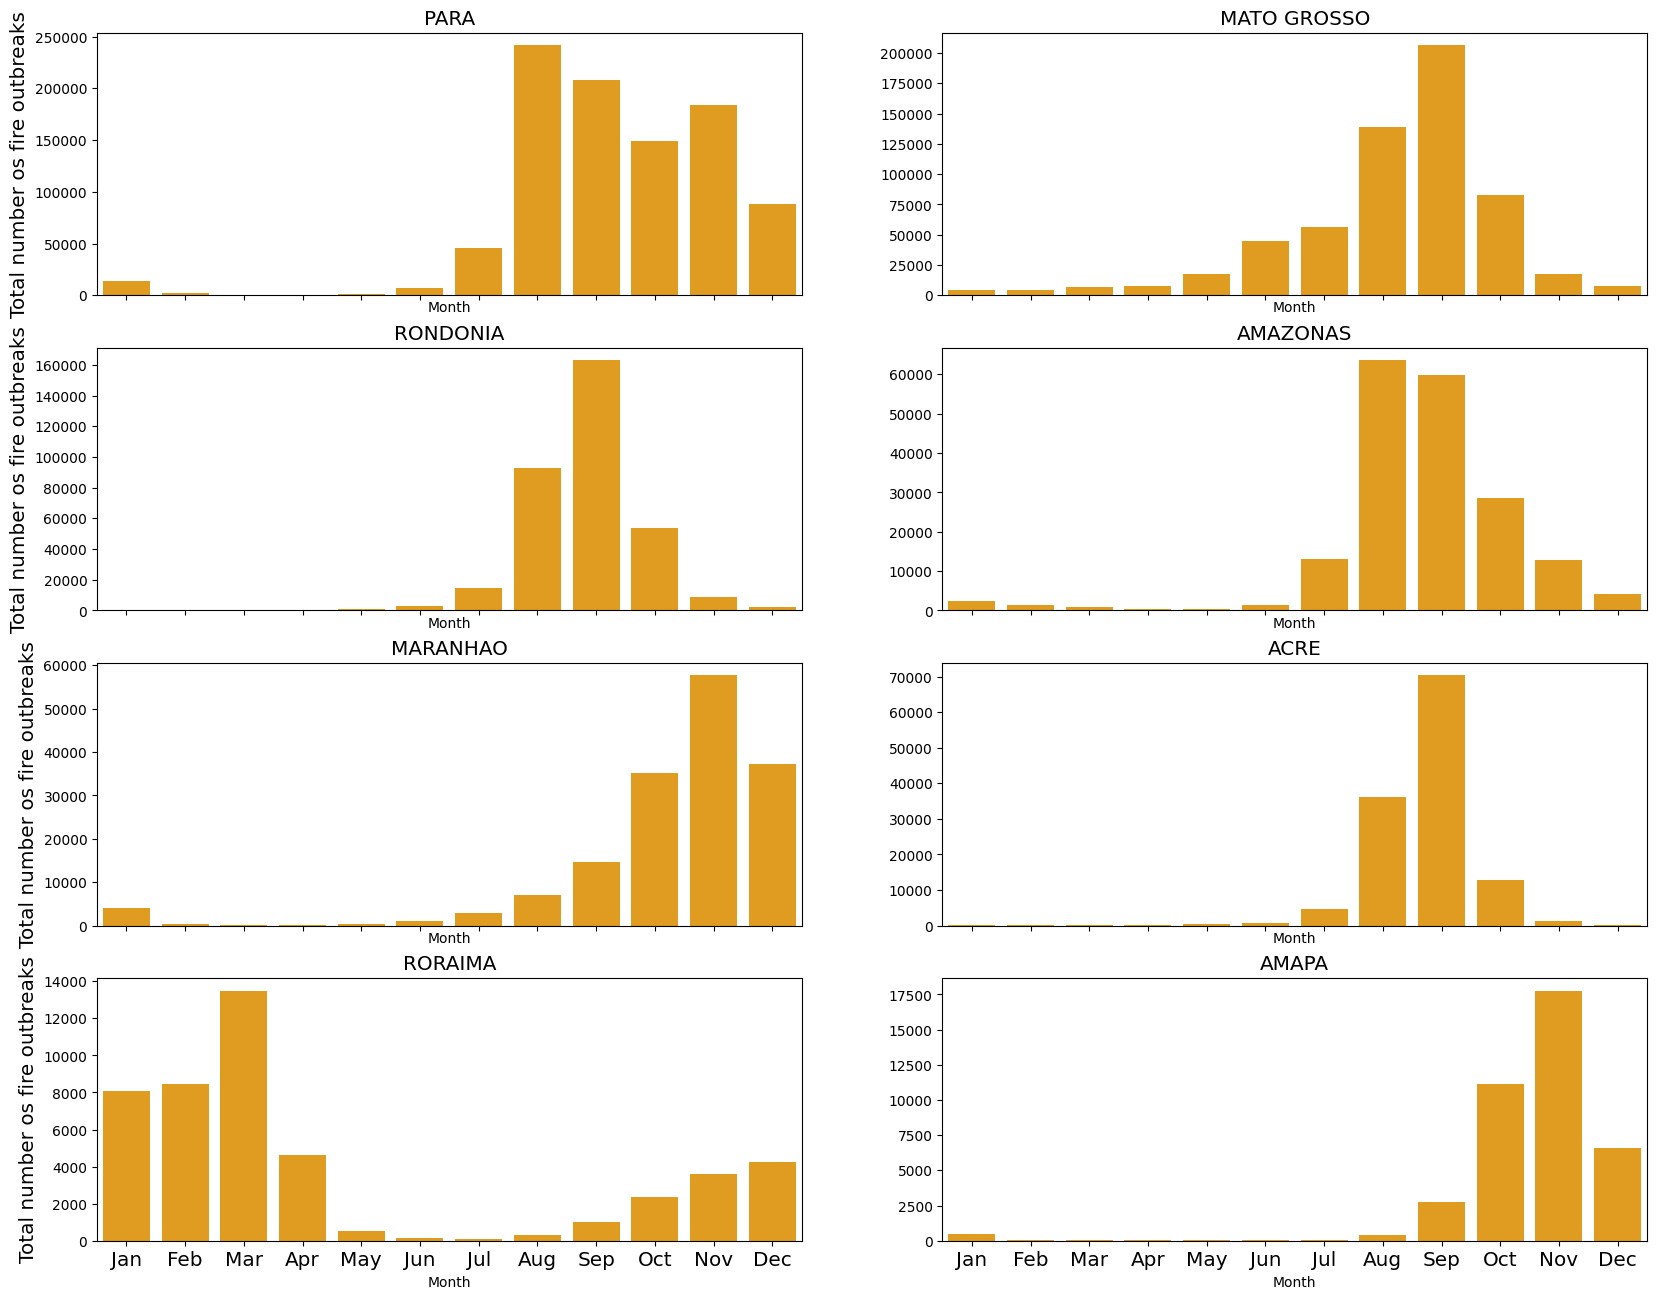

In [25]:
legal_amazon = (
    df_year_all_states[['state','firespots']].groupby('state',as_index=False).sum()
    .sort_values('firespots',ascending=False)['state'].values
)

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(4, 2, figsize=(20, 16), dpi=100, sharex=True)
ax = ax.flat

i=0
for x in legal_amazon:
    sns.barplot(data=df_year_all_states[df_year_all_states['state'] == x], x='month', y='firespots', ax=ax[i], 
                estimator=sum, color='orange', ci=None)
    ax[i].set_title(x, size='x-large')
    ax[i].set_xticklabels(month, fontsize='x-large')

    if x in ['PARA','RORAIMA','RONDONIA','MARANHAO']:
        ax[i].set_ylabel("Total number os fire outbreaks", size='x-large')
    else:
        ax[i].set_ylabel("")
    if x in ['PARA', 'AMAZONAS', 'RORAIMA','AMAPA', 'TOCANTINS','MATO GROSSO','ACRE','RONDONIA','MARANHAO']:
        ax[i].set_xlabel("Month", size='medium')
    else:
        ax[i].set_xlabel("")
    i += 1

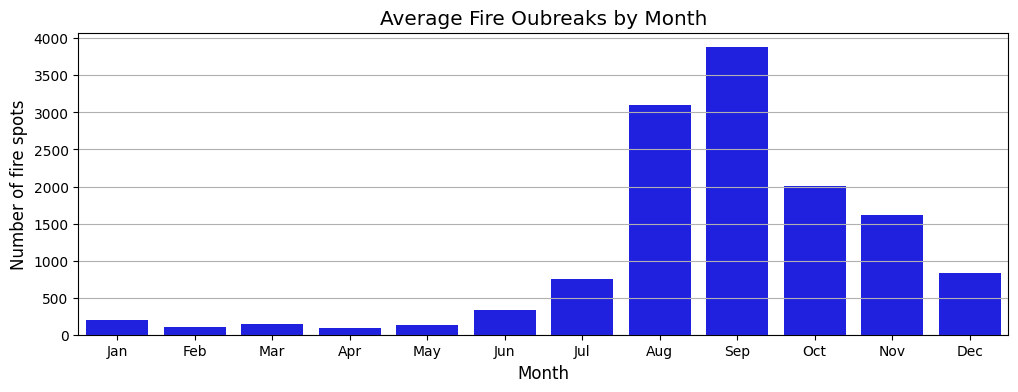

In [26]:
plt.figure(figsize=(12,4), dpi=100)
sns.barplot(data=df_year_all_states, x='month', y='firespots', color='Blue', ci=None)
plt.title("Average Fire Oubreaks by Month", size="x-large")
plt.ylabel("Number of fire spots", size="large")
plt.xlabel("Month", size="large")
plt.xticks(ticks=df_year_all_states['month'].unique()-1, labels=month)
plt.grid(axis='y')

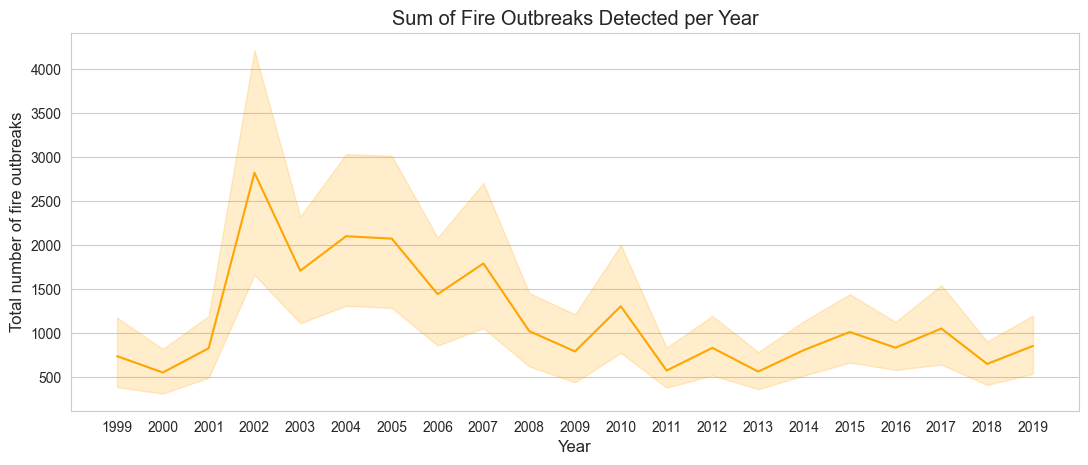

In [137]:
int_year = list(range(1999, 2020))
plt.figure(figsize=(13,5), dpi=100)
sns.lineplot(data=df_year_all_states, x='year', y='firespots',color="orange")
plt.title("Sum of Fire Outbreaks Detected per Year", size="x-large")
plt.ylabel("Total number of fire outbreaks", size="large")
plt.xlabel("Year", size="large")
plt.xticks(int_year)
plt.grid(axis='x')